<a href="https://colab.research.google.com/github/soneyahossain/deep_learning_project/blob/master/deep_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!unzip DATA.zip


In [2]:
import torch.utils.data
import json, os
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import torchvision.transforms as transforms
import pandas as pd
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class UVaBuildinglabel(torch.utils.data.Dataset):
    def __init__(self, image_path, annotation_filepath, transform = None):
        super(UVaBuildinglabel, self).__init__()
        
        print('Loading data...')
        data = pd.read_csv(annotation_filepath)              #json.load(open(annotation_filepath, 'rb'))
        
        self.transform = transforms.Compose(
        [transforms.Resize(320),  # 1. Resize smallest side to 256.
        transforms.RandomCrop(320), # 2. Crop random square of 224x224 pixels.
        #transforms.RandomHorizontalFlip(),
        transforms.ToTensor()])
        
        self.image_path = image_path    # storing image path. 
        
        
        # get the image pixel values and labels
        image_ids = data.iloc[:, 0 ]
        label_ids = data.iloc[:, 1]
        label_names = data.iloc[:, 2]

        self.image_ids = data.iloc[:, 0 ] #[img_name for (img_id, img_name) in paired_id_names]
        self.image_labels = data.iloc[:, 1]   #[img_id for (img_id, img_name) in paired_id_names]
        self.image_classes= data.iloc[:, 2]


        print(image_ids[0])
        print(label_ids[0])
        print(label_names)

        
    def __getitem__(self, index):
        image_name = self.image_ids[index]
        img_ = Image.open(open(os.path.join(self.image_path, image_name), 'rb'))
        img_ = img_.convert("RGB")
        if self.transform:
            img_ = self.transform(img_)
        label_ = self.image_labels[index]
        class_name= self.image_classes[index]
        return img_, label_, image_name,class_name 
    
    def __len__(self):
        return len(self.image_ids)
       
      
# You can unnormalize the transformation of torch's transforms.normalize 
# with this custom transformation.
class UnNormalize(object):
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std
    def __call__(self, tensor):
        for t, m, s in zip(tensor, self.mean, self.std):
            t.mul_(s).add_(m)
        return tensor

trainset = UVaBuildinglabel('DATA', 'trainSet.csv')
valset = UVaBuildinglabel('DATA', 'valSet.csv')

trainset1 = DataLoader(trainset, shuffle=True)
valset1=DataLoader(valset, shuffle=True)
#print(next(iter(dataloader)))

Loading data...
alderman1.jpg
0
0      Alderman Library
1      Alderman Library
2      Alderman Library
3      Alderman Library
4      Alderman Library
             ...       
409       Wilsdorf Hall
410       Wilsdorf Hall
411       Wilsdorf Hall
412       Wilsdorf Hall
413       Wilsdorf Hall
Name: name, Length: 414, dtype: object
Loading data...
alderman9.jpg
0
0     Alderman Library
1     Alderman Library
2     Alderman Library
3     Alderman Library
4          Alumni Hall
            ...       
88       Wilsdorf Hall
89       Wilsdorf Hall
90       Wilsdorf Hall
91       Wilsdorf Hall
92       Wilsdorf Hall
Name: name, Length: 93, dtype: object


torch.Size([1, 3, 320, 320])
tensor([2])
Aquatic & Fitness Center
torch.Size([1, 3, 320, 320])
tensor([11])
Old Cabell Hall
torch.Size([1, 3, 320, 320])
tensor([12])
Olsson Hall
torch.Size([1, 3, 320, 320])
tensor([11])
Old Cabell Hall
torch.Size([1, 3, 320, 320])
tensor([12])
Olsson Hall
torch.Size([1, 3, 320, 320])
tensor([13])
Physics Building
torch.Size([1, 3, 320, 320])
tensor([10])
North Grounds Gym
torch.Size([1, 3, 320, 320])
tensor([15])
The Rotunda
torch.Size([1, 3, 320, 320])
tensor([9])
Newcomb Hall
torch.Size([1, 3, 320, 320])
tensor([16])
Scott Stadium
torch.Size([1, 3, 320, 320])
tensor([7])
Memorial Gym
torch.Size([1, 3, 320, 320])
tensor([7])
Memorial Gym
torch.Size([1, 3, 320, 320])
tensor([6])
Mechanical Building
torch.Size([1, 3, 320, 320])
tensor([3])
Chemical Engineering Building
torch.Size([1, 3, 320, 320])
tensor([16])
Scott Stadium
torch.Size([1, 3, 320, 320])
tensor([7])
Memorial Gym
torch.Size([1, 3, 320, 320])
tensor([0])
Alderman Library
torch.Size([1, 3, 3

torch.Size([1, 3, 320, 320])
tensor([11])
Old Cabell Hall
torch.Size([1, 3, 320, 320])
tensor([16])
Scott Stadium
torch.Size([1, 3, 320, 320])
tensor([15])
The Rotunda
torch.Size([1, 3, 320, 320])
tensor([13])
Physics Building
torch.Size([1, 3, 320, 320])
tensor([6])
Mechanical Building
torch.Size([1, 3, 320, 320])
tensor([19])
Wilsdorf Hall
torch.Size([1, 3, 320, 320])
tensor([4])
John Paul Jones Arena
torch.Size([1, 3, 320, 320])
tensor([3])
Chemical Engineering Building
torch.Size([1, 3, 320, 320])
tensor([3])
Chemical Engineering Building
torch.Size([1, 3, 320, 320])
tensor([1])
Alumni Hall
torch.Size([1, 3, 320, 320])
tensor([14])
Rice Hall
torch.Size([1, 3, 320, 320])
tensor([0])
Alderman Library
torch.Size([1, 3, 320, 320])
tensor([12])
Olsson Hall
torch.Size([1, 3, 320, 320])
tensor([4])
John Paul Jones Arena
torch.Size([1, 3, 320, 320])
tensor([6])
Mechanical Building
torch.Size([1, 3, 320, 320])
tensor([5])
Law School Building
torch.Size([1, 3, 320, 320])
tensor([13])
Physics

torch.Size([1, 3, 320, 320])
tensor([1])
Alumni Hall
torch.Size([1, 3, 320, 320])
tensor([3])
Chemical Engineering Building
torch.Size([1, 3, 320, 320])
tensor([3])
Chemical Engineering Building
torch.Size([1, 3, 320, 320])
tensor([7])
Memorial Gym
torch.Size([1, 3, 320, 320])
tensor([16])
Scott Stadium
torch.Size([1, 3, 320, 320])
tensor([8])
Monroe Hall
torch.Size([1, 3, 320, 320])
tensor([6])
Mechanical Building
torch.Size([1, 3, 320, 320])
tensor([1])
Alumni Hall
torch.Size([1, 3, 320, 320])
tensor([18])
Thornton Hall
torch.Size([1, 3, 320, 320])
tensor([2])
Aquatic & Fitness Center
torch.Size([1, 3, 320, 320])
tensor([1])
Alumni Hall
torch.Size([1, 3, 320, 320])
tensor([10])
North Grounds Gym
torch.Size([1, 3, 320, 320])
tensor([2])
Aquatic & Fitness Center
torch.Size([1, 3, 320, 320])
tensor([13])
Physics Building
torch.Size([1, 3, 320, 320])
tensor([18])
Thornton Hall
torch.Size([1, 3, 320, 320])
tensor([0])
Alderman Library
torch.Size([1, 3, 320, 320])
tensor([18])
Thornton Hal

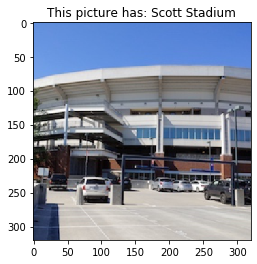

In [3]:
import matplotlib.pyplot as plt

classes = ['Alderman Library', 'Alumni Hall', 'Aquatic & Fitness Center', 'Chemical Engineering Building', 'John Paul Jones Arena', 
           'Law School Building', 'Mechanical Building', 'Memorial Gym', 'Monroe Hall', 
           'Newcomb Hall', 'North Grounds Gym', 'Old Cabell Hall', 'Olsson Hall', 
           'Physics Building', 'Rice Hall', 'The Rotunda', 'Scott Stadium', 'Slaughter Recreation',
           'Thornton Hall', 'Wilsdorf Hall']


for (i, (my_image, my_label,_,class_name)) in enumerate(trainset1):    

#for i in x:
     #my_image, my_label,_,class_name  = trainset.__getitem__(i)

  print(my_image.shape)
  print(my_label)
  print(classes[my_label])

# Show the image and its label.
plt.figure()
plt.title("This picture has: "+ classes[my_label])
# Undo normalization of the pixel values.

# Re-arrange dimensions so it is height x width x channels.
plt.imshow(my_image[0].transpose(0,2).transpose(0,1));
#plt.grid(False); plt.axis('off');

This dataset has 414 training images
<class 'torch.Tensor'>
15
320
Image 320 is a The Rotunda
Image size is 3x320x320


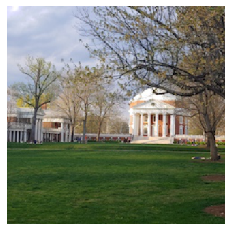

In [4]:
import torchvision.transforms.functional as F

image_index = 320  # Feel free to change this.

# 1. Datasets need to implement the __len__ method for this to work.
print('This dataset has {0} training images'.format(len(trainset1.dataset)))

# 2. Datasets need to implement the  __getitem__ method for this to work.
img, label,_,class_name = trainset1.dataset.__getitem__(image_index)  # Returns image and label.

print(type(img))
print(label)
print(image_index)
print('Image {0} is a {1}'.format(image_index, class_name))
print('Image size is {0}x{1}x{2}'.format(img.shape[0], img.shape[1], img.shape[2]))
# All images have 1 channel x 28 rows x 28 columns.

plt.figure()
plt.imshow(img.transpose(0,2).transpose(0,1));
plt.grid(False); plt.axis('off')
plt.show()

In [5]:
# Softmax function: exp(a) / sum(exp(a))
# Note that this function works for tensors of any shape, it is not a scalar function.
def softmax(a):
    max_val = a.max()  # This is to avoid variable overflows.
    exp_a = (a - max_val).exp()
    return exp_a.div(exp_a.sum())

# Classification function: y = softmax(Wx + b)
# Again, note this function is operating on vectors.
def linear(x, weight, bias):
    return torch.matmul(weight, x) + bias


def loss(label, predictions):
    return -predictions[label].log()

# This computes dL / da = y_hat - y.
def loss_softmax_backward(label, predictions):
    grad_inputs = predictions.clone()
    grad_inputs[label] = grad_inputs[label].item() - 1
    return grad_inputs


def linear_backward(x, weight, bias, gradOutput):
    gradBias = bias.clone().zero_()
    gradWeight = weight.clone().zero_()
    
    gradWeight = gradOutput * x.t()   # dL / dW[i,j] = x[j] * dL / da 
    gradBias.copy_(gradOutput)   # dL / dB[i] = 1 * dL / da
    return gradWeight, gradBias

Train-epoch 0. Iteration 00100, Avg-Loss: 7.0611, Accuracy: 0.0300
Train-epoch 0. Iteration 00200, Avg-Loss: 6.7248, Accuracy: 0.0450
Train-epoch 0. Iteration 00300, Avg-Loss: 6.5484, Accuracy: 0.0600
Train-epoch 0. Iteration 00400, Avg-Loss: 6.3404, Accuracy: 0.0725
Validation-epoch 0. Avg-Loss: 4.8449, Accuracy: 0.1398
Train-epoch 1. Iteration 00100, Avg-Loss: 5.8427, Accuracy: 0.1100
Train-epoch 1. Iteration 00200, Avg-Loss: 5.6180, Accuracy: 0.1400
Train-epoch 1. Iteration 00300, Avg-Loss: 5.2391, Accuracy: 0.1567
Train-epoch 1. Iteration 00400, Avg-Loss: 5.2990, Accuracy: 0.1650
Validation-epoch 1. Avg-Loss: 7.3662, Accuracy: 0.1183
Train-epoch 2. Iteration 00100, Avg-Loss: 4.9146, Accuracy: 0.1400
Train-epoch 2. Iteration 00200, Avg-Loss: 4.9788, Accuracy: 0.1750
Train-epoch 2. Iteration 00300, Avg-Loss: 4.9461, Accuracy: 0.1767
Train-epoch 2. Iteration 00400, Avg-Loss: 4.9567, Accuracy: 0.1875
Validation-epoch 2. Avg-Loss: 5.2782, Accuracy: 0.1720
Train-epoch 3. Iteration 00100,

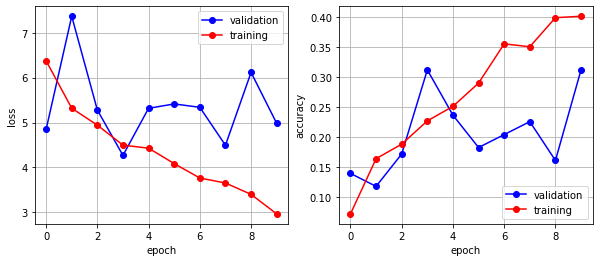

In [6]:
import torch, torchvision, matplotlib
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

# Your code.

# Define a learning rate. 
learningRate = 1e-4

# Define number of epochs.
N = 10

# Initialize bias and weight with random values again.
weight = torch.empty(20, 3 * 320 * 320).normal_(0, 0.01)
bias = torch.zeros(20, 1)

# log accuracies and losses.
train_accuracies = []; 
val_accuracies = []
train_losses = []; 
val_losses = []

# Training loop. Please make sure you understand every single line of code below.
# Go back to some of the previous steps in this lab if necessary.
for epoch in range(0, N):
    correct = 0.0
    cum_loss = 0.0

    #for i in range(0, 100):
        #img, label,_,class_name = trainset.__getitem__(i)
    
    #Make a pass over the training data.
    for (i, (img, label,_,class_name)) in enumerate(trainset1):  
        x = img[0]
        x = x.view(3 * 320 * 320, 1)
        
        # Forward pass. (Prediction stage)
        predictions = softmax(linear(x, weight, bias))
        #print(predictions)
        cum_loss += loss(label, predictions).item()
        max_score, max_label = predictions.max(0)

        #print("max_score: ",max_score)
        #print("max_label:", max_label)
        #print("actual_label", label)



        if max_label[0] == label: correct += 1
        
        #Backward pass. (Gradient computation stage)
        gradOutput = loss_softmax_backward(label, predictions)
        gradWeight, gradBias = linear_backward(x, weight, bias, gradOutput)
        
        # Parameter updates.
        weight.add_(-learningRate, gradWeight)
        bias.add_(-learningRate, gradBias)
        
        # Logging the current results on training.
        if (i + 1) % 100 == 0:
            print('Train-epoch %d. Iteration %05d, Avg-Loss: %.4f, Accuracy: %.4f' % 
                  (epoch, i + 1, cum_loss / (i + 1), correct / (i + 1)))
    
    train_accuracies.append(correct / len(trainset))
    train_losses.append(cum_loss / len(trainset))
    
    
    # Make a pass over the validation data.
    correct = 0.0
    cum_loss = 0.0
    #for j in range(0, 100):
        #img, label,_,class_name = valset.__getitem__(j)
    for (i, (img, label,_,class_name)) in enumerate(valset1):  
        x = img[0]
        x = x.view(3 * 320 * 320, 1)
        
        # Forward pass. (Prediction stage)
        predictions = softmax(linear(x, weight, bias))
        cum_loss += loss(label, predictions).item()
        max_score, max_label = predictions.max(0)
        
        #print("val_max_score: ",max_score)
        #print("val_max_label:", max_label)
        #print("val_actual_label", label)

        if max_label[0] == label: correct += 1
          
          
    val_accuracies.append(correct / len(valset))
    val_losses.append(cum_loss / len(valset))
            
    # Logging the current results on validation.
    print('Validation-epoch %d. Avg-Loss: %.4f, Accuracy: %.4f' % 
          (epoch, cum_loss / len(valset), correct / len(valset)))
#--------------------------------------------------------------------------

plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
plt.plot(val_losses, 'bo-', label = 'val-loss')
plt.plot(train_losses, 'ro-', label = 'train-loss')
plt.grid('on')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['validation', 'training'], loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, 'bo-', label = 'val-acc')
plt.plot(train_accuracies, 'ro-', label = 'train-acc')
plt.ylabel('accuracy')
plt.grid('on')
plt.xlabel('epoch')
plt.legend(['validation', 'training'], loc='lower right')
plt.show()

actual label= Alderman Library
Image 2 is a Wilsdorf Hall
Image size is 3x320x320


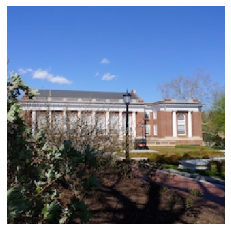

In [7]:
#do some predictions

image_index = 2  # Feel free to change this.


# 2. Datasets need to implement the  __getitem__ method for this to work.
img, label,_,class_name = trainset1.dataset.__getitem__(image_index)  # Returns image and label.



x = x.view(3 * 320 * 320, 1)

# Forward pass. (Prediction stage)
predictions = softmax(linear(x, weight, bias))
#print(predictions)
max_score, max_label = predictions.max(0)

print("actual label=", classes[label])
print('Image {0} is a {1}'.format(image_index, classes[max_label]))
print('Image size is {0}x{1}x{2}'.format(img.shape[0], img.shape[1], img.shape[2]))
# All images have 1 channel x 28 rows x 28 columns.

plt.figure()
plt.imshow(img.transpose(0,2).transpose(0,1));
plt.grid(False); plt.axis('off')
plt.show()
